In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

sns.set(style="whitegrid", palette="muted", color_codes=True) #

In [2]:
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))
    
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

In [3]:
def draw_lp_contour(func, lp=1, xlim=(0, 1), ylim=(0, 1)):
    n = 201
    X, Y = np.meshgrid(np.linspace(xlim[0], xlim[1], n), np.linspace(ylim[0], ylim[1], n))
    Z = func(X, Y, lp) 

    cm = generate_cmap(['salmon', 'salmon', 'salmon', 'salmon', 'blue'])

    interval = [i/10. -1 for i in range(20)]
    im = plt.contour(X, Y, Z, interval, alpha=0.5, cmap=cm)

    #fig.colorbar(im)
    plt.title("Contour of LP{}".format(lp))
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

In [4]:
def LP(x, y, lp=1):
    x = np.abs(x) 
    y = np.abs(y)
    return (x**lp + y**lp)**(1./lp)
    

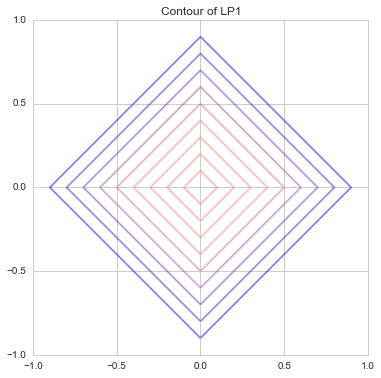

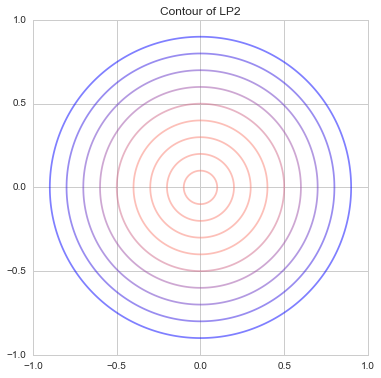

In [6]:
for lp in xrange(2):
    fig =plt.figure(figsize=(6,6))
    draw_lp_contour(LP, lp+1, (-1, 1),(-1, 1))

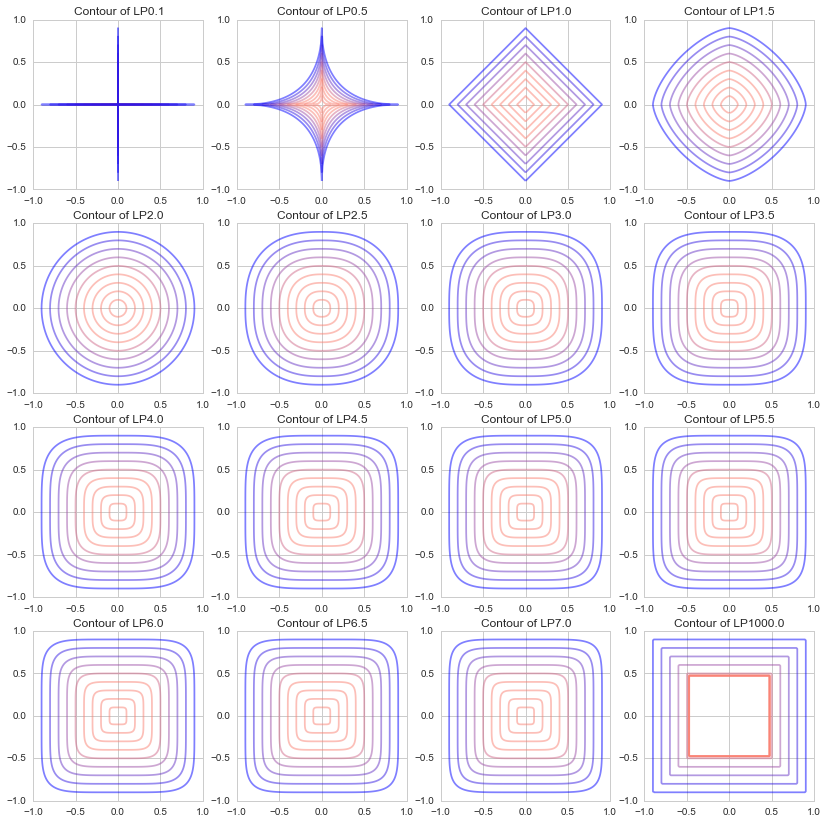

In [31]:
fig =plt.figure(figsize=(14,14))
size = 4
for i, lp in enumerate(np.r_[[0.1], np.linspace(0.5, 7, 14), [1000]]):
    plt.subplot(size, size, i+1)
    draw_lp_contour(LP, lp, (-1, 1),(-1, 1))

### 参考
Wikipedia "Lp空間"<br>
　https://ja.wikipedia.org/wiki/Lp空間